# K Means Clustering

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.


### Import libraries

In [1]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

### Create Synthetic dataset

Let's make use of sklearn's make_blobs function to create a dataset consisting of 500 entries, 2 features, 3 clusters. The reason to create synthetic data is to compare if the predicted result is same as what was expected.

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples = 500, n_features = 2, centers = 3, cluster_std = 1.8)

In [4]:
data[0].shape

(500, 2)

data[0] is our unlabelled dataset. Here is a scatter plot showing the synthetic dataset.

Text(0.5, 1.0, 'Unlabelled dataset for K means clustering')

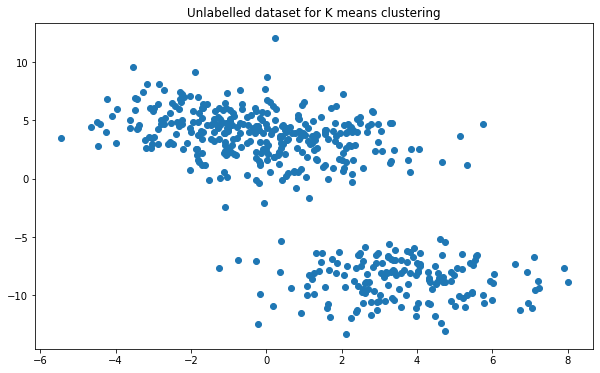

In [5]:
plt.figure(figsize = (10,6))
plt.scatter(data[0][:,0],data[0][:,1])
plt.title('Unlabelled dataset for K means clustering')

It's a bit hard to distinguish 3 clusters in this noisy dataset. Let's see if K-means algorithm can find structure in this dataset.

### Creating Clusters

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters = 3) #object instantiation

In [8]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
kmeans.cluster_centers_

array([[ 1.02672672,  2.71441254],
       [ 3.5447739 , -8.64511272],
       [-1.76207332,  5.21093066]])

These are the cluster centroids!

In [10]:
kmeans.labels_ #predicted clusters

array([2, 1, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 1,
       0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1,
       2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2,
       0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0,
       0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1,
       2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0, 2, 0,
       1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
       1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1,

In real world examples, this will be the last step of processing, since we will not have a labeled data to predict the accurarcy or f1-score.
  
Since we have created a sythetic data with labelled points, lets see if this result matches the original one.

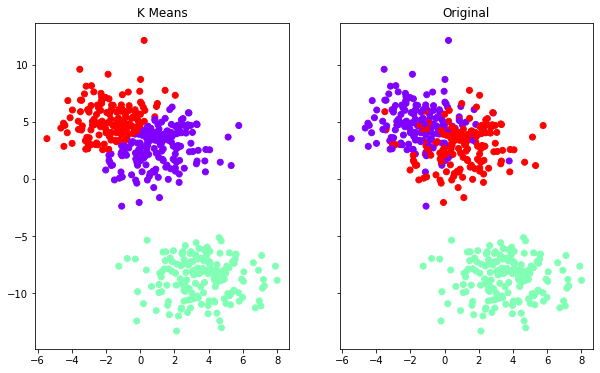

In [11]:
fig, (ax1,ax2) = plt.subplots(1 , 2, sharey = True, figsize = (10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c = kmeans.labels_ , cmap = 'rainbow')

ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c = data[1] , cmap = 'rainbow')

The colors are meaningless in reference between the two plots. Inspite of the presence of outliers and noisy dataset,K means algorithm has done a fine job in clustering unlabelled points.